In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Escaladores
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier

# Metricas
from sklearn.metrics import confusion_matrix, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Creacion del dataset

In [2]:
data = datasets.load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Preprocesamiento de datos

In [3]:
x = df.drop("target", axis=1)
y = df["target"]

### Division de datos

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Visualizacion de datos

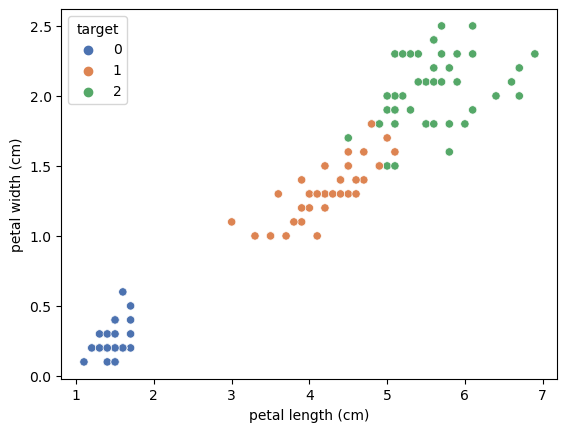

In [5]:
x_plot = x_train.copy()
x_plot["target"] = y_train
sns.scatterplot(x = "petal length (cm)", y= "petal width (cm)", data= x_plot, hue="target", palette="deep")
plt.show()

### Normalizacion de datos

#### MinMaxScaler

In [6]:
mmx = MinMaxScaler()
x_train_mmx = mmx.fit_transform(x_train)
x_test_mmn = mmx.transform(x_test)

# Solo ponemos fit en el conjunto de entrenamiento para que posteriormente
# tanto los datos de testeo como futuros datos se ajusten al rango de los de entrenamiento.

In [7]:
x_train_mmx

array([[0.58333333, 0.45833333, 0.75862069, 0.70833333],
       [0.30555556, 0.41666667, 0.5862069 , 0.58333333],
       [0.25      , 0.625     , 0.06896552, 0.04166667],
       [0.5       , 0.41666667, 0.65517241, 0.70833333],
       [0.58333333, 0.33333333, 0.77586207, 0.875     ],
       [0.25      , 0.29166667, 0.48275862, 0.54166667],
       [0.38888889, 0.75      , 0.10344828, 0.08333333],
       [0.47222222, 0.29166667, 0.68965517, 0.625     ],
       [0.44444444, 0.41666667, 0.53448276, 0.58333333],
       [0.41666667, 0.25      , 0.5       , 0.45833333],
       [0.69444444, 0.41666667, 0.75862069, 0.83333333],
       [0.11111111, 0.5       , 0.03448276, 0.04166667],
       [0.72222222, 0.45833333, 0.68965517, 0.91666667],
       [0.19444444, 0.625     , 0.0862069 , 0.20833333],
       [0.30555556, 0.70833333, 0.06896552, 0.04166667],
       [0.19444444, 0.        , 0.4137931 , 0.375     ],
       [0.61111111, 0.41666667, 0.75862069, 0.70833333],
       [0.66666667, 0.54166667,

In [8]:
x_test_mmn

array([[ 0.41666667,  0.33333333,  0.68965517,  0.95833333],
       [ 0.47222222,  0.08333333,  0.5       ,  0.375     ],
       [ 0.33333333,  0.91666667,  0.05172414,  0.04166667],
       [ 0.83333333,  0.375     ,  0.89655172,  0.70833333],
       [ 0.19444444,  0.58333333,  0.06896552,  0.04166667],
       [ 0.55555556,  0.54166667,  0.84482759,  1.        ],
       [ 0.19444444,  0.625     ,  0.03448276,  0.08333333],
       [ 0.66666667,  0.45833333,  0.62068966,  0.58333333],
       [ 0.69444444,  0.33333333,  0.63793103,  0.54166667],
       [ 0.5       ,  0.33333333,  0.5       ,  0.5       ],
       [ 0.5       ,  0.25      ,  0.77586207,  0.54166667],
       [ 0.58333333,  0.5       ,  0.5862069 ,  0.58333333],
       [ 0.5       ,  0.33333333,  0.62068966,  0.45833333],
       [ 0.61111111,  0.33333333,  0.60344828,  0.58333333],
       [ 0.5       ,  0.375     ,  0.62068966,  0.54166667],
       [ 0.16666667,  0.66666667,  0.05172414,  0.        ],
       [ 0.47222222,  0.

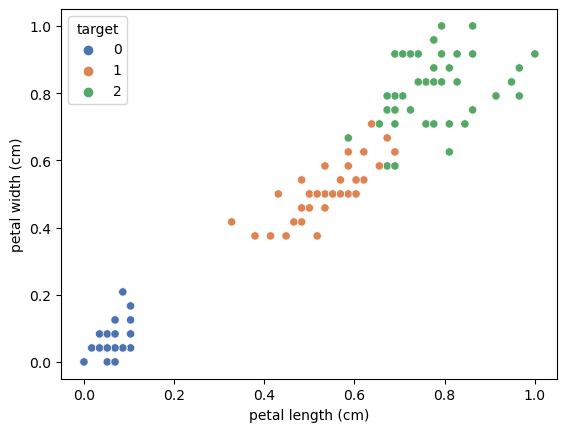

In [9]:
x_plot = pd.DataFrame(x_train_mmx, columns=x_plot.columns[:-1], index= x_plot.index)
x_plot["target"] = y_train

sns.scatterplot(x = "petal length (cm)", y= "petal width (cm)", data= x_plot, hue="target", palette="deep")
plt.show()

#### Standard Scaler

In [25]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

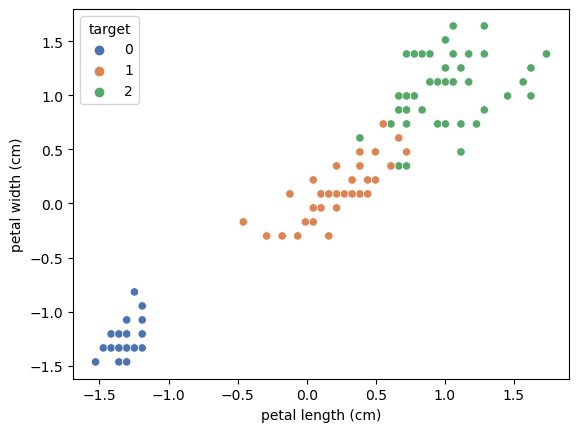

In [11]:
x_plot = pd.DataFrame(x_train, columns=x_plot.columns[:-1], index= x_plot.index)
x_plot["target"] = y_train

sns.scatterplot(x = "petal length (cm)", y= "petal width (cm)", data= x_plot, hue="target", palette="deep")
plt.show()

### PCA

In [12]:
pca = PCA()
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

In [13]:
pca.explained_variance_ratio_

array([0.72229951, 0.2397406 , 0.03335483, 0.00460506])

In [26]:
# Escogemos solo los 2 primeros componentes por que son los que mas afectan a nuestros datos
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca.explained_variance_ratio_

array([0.72229951, 0.2397406 ])

In [15]:
# Probamos con solo el primero para ver que pasa
pca = PCA(n_components=1)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca.explained_variance_ratio_

array([0.75079979])

<Axes: xlabel='Componente 1', ylabel='y'>

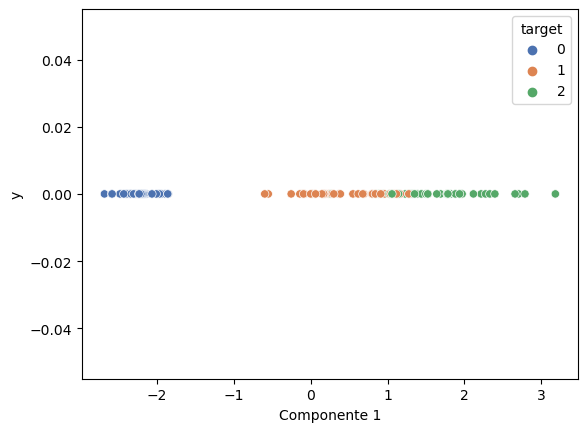

In [16]:
x_plot = pd.DataFrame(x_train, columns=["Componente 1"], index=x_plot.index)
x_plot["y"] = 0
x_plot["target"] = y_train

sns.scatterplot(x= "Componente 1", y="y", data=x_plot, hue="target", palette="deep")

### Creacion del modelo

In [27]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [28]:
y_pred = clf.predict(x_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.69      0.75        13
           2       0.50      0.67      0.57         6

    accuracy                           0.80        30
   macro avg       0.77      0.79      0.77        30
weighted avg       0.82      0.80      0.81        30



Lo curioso es que si solo cogemos 1 componente, la precision es del 93%, mientras que si cogemos los 2 componentes la precision baja hasta un 80%.
¡¡ATENCION!!
Probar con varios componentes en futuros ejercicios para ver cual tiene más precisión.